In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette=plt.get_cmap('Set3')

In [2]:
netflix_df=pd.read_csv("/content/netflix_titles.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print('\n Columns with missing value:')
print(netflix_df.isnull().any())


 Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


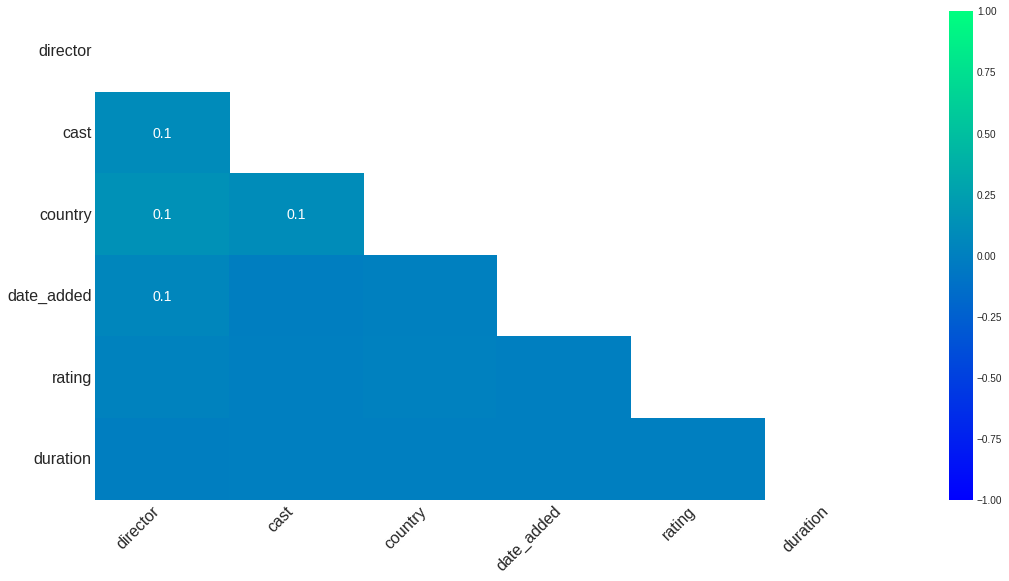

In [5]:
netflix_df.T.apply(lambda x:x.isnull().sum(),axis=1)
msno.heatmap(netflix_df, figsize=(18,9),cmap='winter')
plt.show()

In [6]:
netflix_df.isnull().sum().sum()

4307

In [7]:
netflix_df.director.fillna("No Director",inplace=True)
netflix_df.cast.fillna("No cast",inplace=True)
netflix_df.country.fillna("Country unavailable",inplace=True)
netflix_df.dropna(subset=["date_added","rating"],inplace=True)

In [8]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

Exploratory Analysis and Visualisation

1.Netflix Content by Type


Analysis entire Netfix dataset consisting of both movies and shows.Lets compare the total number of movies and shows in this dataset to know which one is the majority.

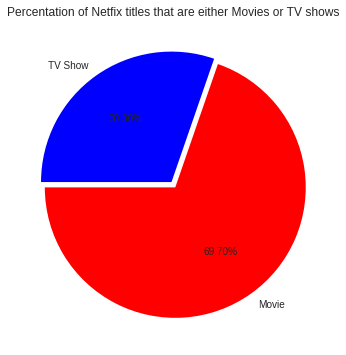

In [9]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netfix titles that are either Movies or TV shows")
g=plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts().index,colors=['red','blue'],autopct='%1.2f%%',startangle=180)
plt.show()

In [10]:
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year
netflix_year_df=netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "date_added":"count"})
netflix_year_df

<ipython-input-10-d298fbd876ea>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
<ipython-input-10-d298fbd876ea>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
<ipython-input-10-d298fbd876ea>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1186
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [11]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "date_added":"count"})
movies_year_df

,year,count
0,2019,1424
1,2020,1284
2,2018,1237
3,2021,993
4,2017,837
5,2016,253
6,2015,56
7,2014,19
8,2011,13
9,2013,6


In [12]:
shows_year_df=netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index":"year","date_added":"count"})
shows_year_df

,year,count
0,2020,595
1,2019,592
2,2021,505
3,2018,411
4,2017,349
5,2016,175
6,2015,26
7,2014,5
8,2013,5
9,2008,1


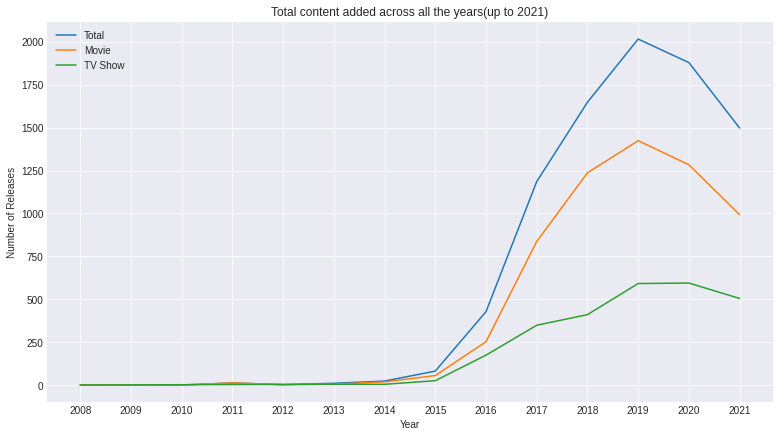

In [13]:
fig,ax=plt.subplots(figsize=(13,7))
sns.lineplot(data=netflix_year_df, x='year',y='count')
sns.lineplot(data=movies_year_df, x='year',y='count')
sns.lineplot(data=shows_year_df, x='year',y='count')
ax.set_xticks(np.arange(2008,2022,1))
plt.title("Total content added across all the years(up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Number of Releases")
plt.xlabel("Year")
plt.show()

3. Countries by the amount of the Produces Content

Next is exploring the countries by the amount of the produces content of Netflix. We need to seperate the countries within a flim before analyzing it, then removing titles with no countries available.

In [14]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [16]:
filtered_countries=netflix_df.set_index('title').country.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
filtered_countries=filtered_countries[filtered_countries!='Country Unavailable']
iplot([go.Choropleth(
    locationmode='country names',
    locations=filtered_countries,
    z=filtered_countries.value_counts()
)])

4. Top Directors on Netflix

To know the most popular director, we can visualize it

In [17]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from wordcloud import WordCloud, ImageColorGenerator

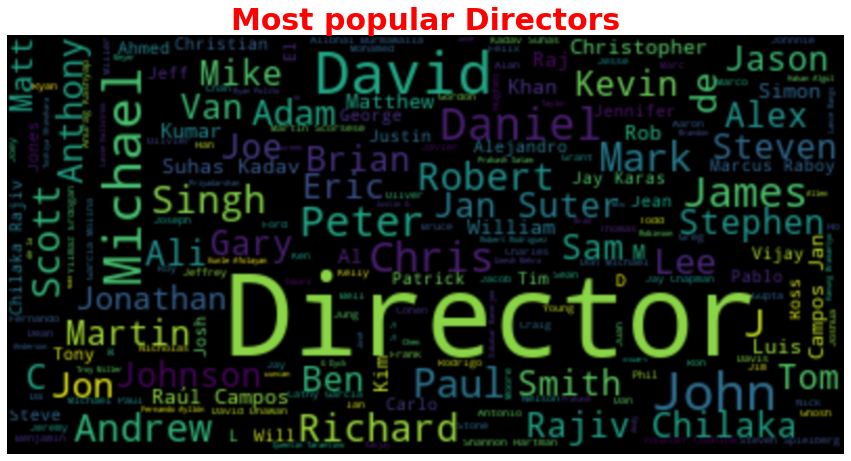

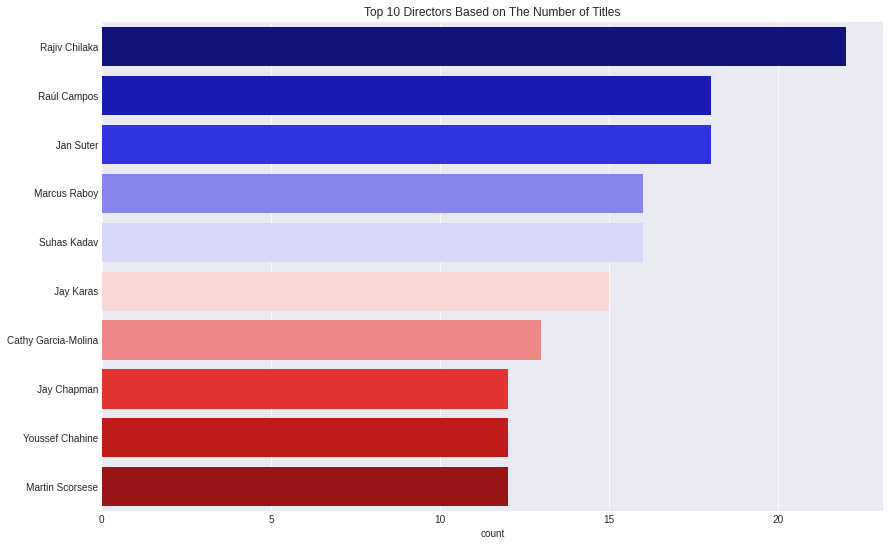

In [19]:
text=" ".join(str(each)for each in netflix_df.director)
# Create and generate a word cloud image:
wordcloud=WordCloud(max_words=200,background_color="black").generate(text)
plt.figure(figsize=(15,10))
#Display the generated image:
plt.imshow(wordcloud, interpolation='quadric')
plt.title('Most popular Directors',fontsize=30,fontweight='bold',fontname='Times New Roman Bold',color="red")
plt.axis("off")
plt.show()
filtered_directors=netflix_df[netflix_df.director!='No Director'].set_index('title').director.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(14,9))
plt.title("Top 10 Directors Based on The Number of Titles")
sns.countplot(y=filtered_directors, order=filtered_directors.value_counts().index[:10],palette='seismic')
plt.show()

5. Top Genres of Netflix

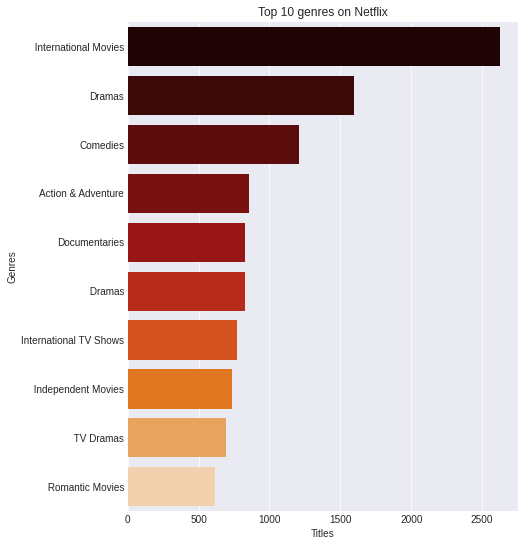

In [20]:
filtered_genres=netflix_df.set_index('title').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True);
plt.figure(figsize=(7,9))
g=sns.countplot(y=filtered_genres, order=filtered_genres.value_counts().index[:10],palette="gist_heat")
plt.title("Top 10 genres on Netflix")
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Q:What is the largest count of Netfix rating?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



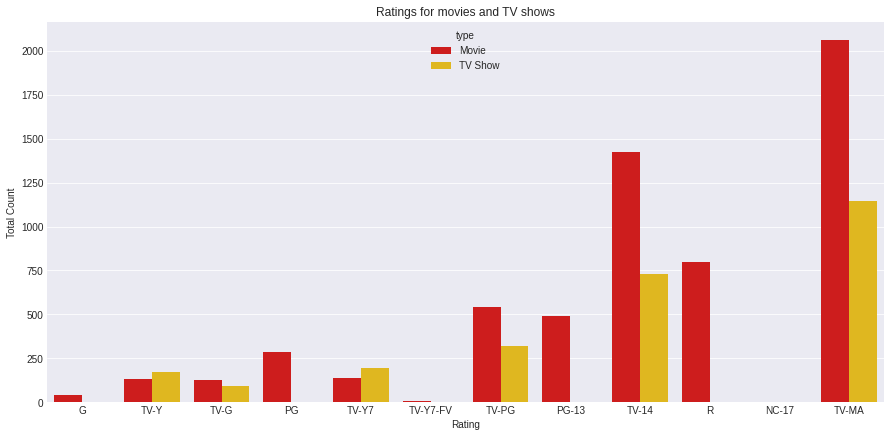

In [21]:
order=['G','TV-Y','TV-G','PG','TV-Y7','TV-Y7-FV','TV-PG','PG-13','TV-14','R','NC-17','TV-MA']
plt.figure(figsize=(15,7))
g=sns.countplot(netflix_df.rating, hue=netflix_df.type, order=order, palette="hot");
plt.title("Ratings for movies and TV shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of TV and Movie shows is made with a "TV-MA" rating

Length Distribution of the films

Top 20 shortest movies on Netflix

Q:Who are the top 10 actors on Netflix?

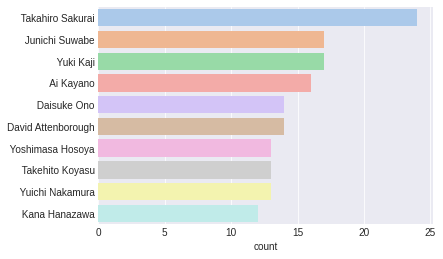

In [22]:
filtered_cast_shows=netflix_shows_df[netflix_shows_df.cast!='No cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')

The top actor on Netflix TV show is Takahiro Sakurai

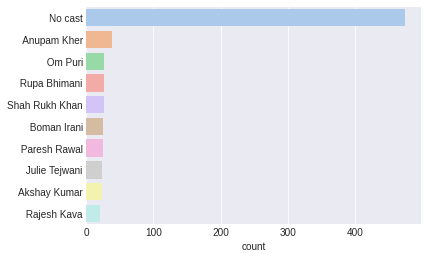

In [23]:
filtered_cast_movie=netflix_movies_df[netflix_movies_df.cast!='No Cast'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

Top actor on Netflix movies is Anupam Kher